In [0]:
#Library

import torch
import numpy as np
from torch.autograd import Variable
from torch.utils.data import Dataset,DataLoader
import matplotlib.pyplot as plt

In [0]:
#Make a dataset

class CoordinateDataset(Dataset):   
    def __init__(self):
        #Enter the address of data
        csvData=np.loadtxt('/content/drive/My Drive/data_spiral.csv',delimiter=',',dtype=np.float32) #파일 읽어오기
        self.len=csvData.shape[0]
        self.X=torch.from_numpy(csvData[:,:2]) #coordinates
        self.Y=torch.from_numpy(csvData[:,-1]).type(torch.LongTensor) #class
        
    def __getitem__(self,index):
        return self.X[index], self.Y[index]
    
    def __len__(self):
        return self.len
    
dataset = CoordinateDataset()
train_loader = DataLoader(dataset = dataset,
                         batch_size=32,
                         shuffle=True,
                         num_workers=0)

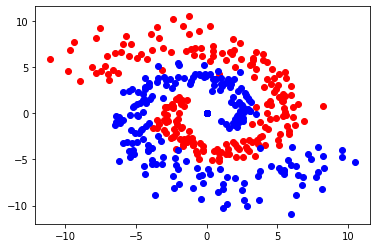

In [133]:
#Display the data
#Not required

#Enter the address of data
data=np.loadtxt('/content/drive/My Drive/data_spiral.csv',delimiter=',',dtype=np.float32) #파일 읽어오기

zeroData=np.zeros((400,2))
oneData=np.zeros((400,2)) #class 1과 2로 나눠서 array로 정리

for i in range(data.shape[0]):
  if (data[i,-1]==0):
    zeroData[i,0]=data[i,0]
    zeroData[i,1]=data[i,1]
  else:
    oneData[i,0]=data[i,0]
    oneData[i,1]=data[i,1]

plt.scatter(zeroData[:,0],zeroData[:,1],c='r') 
plt.scatter(oneData[:,0],oneData[:,1],c='b') #scatter로 읽어들인거 보기

In [0]:
#Make a model

class Net(torch.nn.Module):
    
    def __init__(self):#initialization 정의
        super(Net,self).__init__()
        self.relu = torch.nn.ReLU()
        self.tanh = torch.nn.Tanh()
        self.l1=torch.nn.Linear(2,5)
        self.l2=torch.nn.Linear(5,5)
        self.l3=torch.nn.Linear(5,5)
        self.l4=torch.nn.Linear(5,2) 
               
        
    def forward(self,x):
        x = self.relu(self.l1(x))
        x = self.relu(self.l2(x))
        x = self.relu(self.l3(x))
        x = self.l4(x)
        
        return x 

model = Net()

In [135]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.005)

# Training loop
print("START EPOCH")
loss_array = np.array([])
for epoch in range(200):
    print("EPOCH : {} / 200".format(epoch+1))
    for i, data in enumerate(train_loader):
        inputs, labels = data
        inputs, labels = Variable(inputs), Variable(labels)

        y_pred = model(inputs)

        loss = criterion(y_pred, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        loss = loss.detach().numpy()
    loss_array = np.append(loss_array, loss, axis = None)
    print(loss)
print("END")
loss_array

START EPOCH
EPOCH : 1 / 200
0.65331316
EPOCH : 2 / 200
0.68400687
EPOCH : 3 / 200
0.65823364
EPOCH : 4 / 200
0.6029944
EPOCH : 5 / 200
0.6732726
EPOCH : 6 / 200
0.5124171
EPOCH : 7 / 200
0.5855326
EPOCH : 8 / 200
0.49577013
EPOCH : 9 / 200
0.48051202
EPOCH : 10 / 200
0.52407223
EPOCH : 11 / 200
0.53497154
EPOCH : 12 / 200
0.35749897
EPOCH : 13 / 200
0.34045824
EPOCH : 14 / 200
0.3416959
EPOCH : 15 / 200
0.364012
EPOCH : 16 / 200
0.26960668
EPOCH : 17 / 200
0.2807891
EPOCH : 18 / 200
0.32936877
EPOCH : 19 / 200
0.34336048
EPOCH : 20 / 200
0.11050802
EPOCH : 21 / 200
0.23019132
EPOCH : 22 / 200
0.2001656
EPOCH : 23 / 200
0.26645792
EPOCH : 24 / 200
0.09520715
EPOCH : 25 / 200
0.2686663
EPOCH : 26 / 200
0.22620413
EPOCH : 27 / 200
0.12223817
EPOCH : 28 / 200
0.20624757
EPOCH : 29 / 200
0.32953915
EPOCH : 30 / 200
0.17083432
EPOCH : 31 / 200
0.0836681
EPOCH : 32 / 200
0.21761082
EPOCH : 33 / 200
0.18504131
EPOCH : 34 / 200
0.08568896
EPOCH : 35 / 200
0.09528481
EPOCH : 36 / 200
0.084498495

array([0.65331316, 0.68400687, 0.65823364, 0.60299438, 0.67327261,
       0.51241708, 0.58553261, 0.49577013, 0.48051202, 0.52407223,
       0.53497154, 0.35749897, 0.34045824, 0.3416959 , 0.364012  ,
       0.26960668, 0.28078911, 0.32936877, 0.34336048, 0.11050802,
       0.23019132, 0.2001656 , 0.26645792, 0.09520715, 0.2686663 ,
       0.22620413, 0.12223817, 0.20624757, 0.32953915, 0.17083432,
       0.0836681 , 0.21761082, 0.18504131, 0.08568896, 0.09528481,
       0.08449849, 0.08699301, 0.2049752 , 0.09822075, 0.20180042,
       0.17501131, 0.03632051, 0.09767416, 0.09990859, 0.19486669,
       0.09145513, 0.04286712, 0.11962536, 0.0756041 , 0.09527027,
       0.19762208, 0.04642649, 0.16135691, 0.08273924, 0.38548878,
       0.03006207, 0.08576891, 0.3016893 , 0.04195565, 0.04887744,
       0.02019283, 0.11089583, 0.12769324, 0.06943858, 0.27598691,
       0.21739306, 0.02365715, 0.04607641, 0.17725152, 0.1683284 ,
       0.10400522, 0.13470197, 0.02863334, 0.07439388, 0.09719

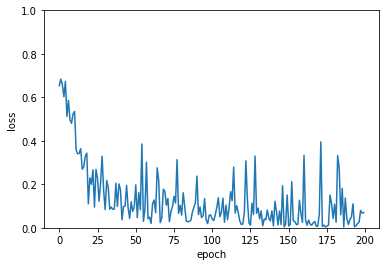

In [136]:
epoch_len = 200
plt.plot(np.arange(200)[:epoch_len],loss_array[:epoch_len])
plt.ylim(0,1)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

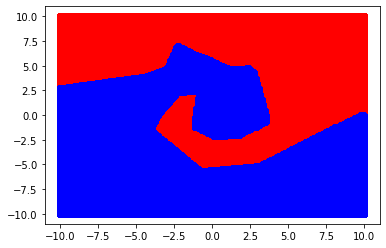

In [137]:
#Make a test set and display results
#Test set consists of 200*200 points

testData = np.zeros((200*200,2))
twoD = np.linspace(-10,10,200)
a=0
for i in range(200):
  for j in range(200):
    testData[a,0]=twoD[j,]
    testData[a,1]=twoD[i,]
    a=a+1
testData = torch.from_numpy(np.float32(testData))

redX = []
redY = []
blueX = []
blueY = []

for i, data in enumerate(train_loader):
        # get the inputs
        inputs, labels = data
        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)

        # Forward pass: Compute predicted y by passing x to the model
        testPred = model(testData)
        # Compute and print loss
        v,r = testPred.max(1)
        r = (r.detach().cpu().numpy())
        coor = (testData.detach().cpu().numpy())

        for j in range(len(r)):
          if (r[j]==0):
            redX.append(coor[j][0])
            redY.append(coor[j][1])
          else:
            blueX.append(coor[j][0])
            blueY.append(coor[j][1])

plt.scatter(redX, redY, c='r')
plt.scatter(blueX, blueY, c='b')